In [1]:
# Version matplotlib should be >= 3.3.4
import matplotlib
print(matplotlib.__version__)

import pandas as pd
import numpy as np

# Version pgmpy should be >= 0.1.13
import pgmpy
print(pgmpy.__version__)

# Latest version bnlearn
import bnlearn as bn
print(bn.__version__)

3.8.4
0.1.25
0.8.8


In [140]:
dir = "C:/Users/foresight_User/Desktop/公司文件/4.CIT季賽/測試資料/"
data = pd.read_csv(dir+"CH_TO.csv").drop(columns=["Context Name"])
data.columns = list(map(lambda x: "x_" +str(x) ,range(len(data.columns)-1)))+["Y"]
#
# feature = pd.read_csv(dir+"wb/Indicator_Data(1).csv").drop(columns=["Unnamed: 74","Context Name"])#.to_numpy()
# target = pd.read_csv(dir+"wb/Metrology_Data(1).csv")[["Point1"]]#.to_numpy()
# feature.columns = list(map(lambda x: "x_" +str(x) ,range(len(feature.columns))))
# target.columns = ["Y"]
# data = pd.concat([feature,target],axis=1)
#

In [141]:
data

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_21,x_22,x_23,x_24,x_25,x_26,x_27,x_28,x_29,Y
0,4,8996,1.904297,14.77051,100.78130,0.000000,39.64844,50.0,4.150391,163.2735,...,16.00037,98.33913,178.04,997.3535,1.152344,1.132813,116.9837,249.4824,0.000000,13972.4
1,4,8996,1.855469,14.77051,100.78130,0.000000,39.64844,49.8,4.150391,162.6306,...,15.99884,98.01767,178.04,997.3535,1.152344,1.132813,116.6622,248.9063,0.000000,13989.6
2,3,8177,3.662109,14.96582,104.88280,0.000000,39.84375,50.8,4.150391,167.1310,...,15.99884,101.87520,179.05,998.5059,1.152344,1.171875,117.3051,249.4824,0.000000,14106.8
3,2,8177,6.103516,14.96582,110.15630,0.000000,39.64844,50.7,4.101563,175.8103,...,15.99976,105.08970,176.03,999.4653,1.137695,1.132813,124.6986,249.7241,0.568848,13726.4
4,3,8177,3.564453,14.96582,104.88280,0.000000,39.84375,50.7,4.150391,166.4881,...,15.99731,101.87520,180.06,997.9297,1.152344,1.171875,117.3051,249.4824,0.576172,14222.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,2,8997,0.732422,14.96582,113.67190,-0.566406,38.51563,51.1,4.101563,159.7375,...,15.99884,94.16019,179.02,996.6211,0.000000,1.132813,109.9116,248.0176,-0.568848,14150.8
632,2,8997,0.732422,14.96582,113.67190,-0.566406,39.08203,51.1,4.150391,162.6306,...,15.99884,93.19582,179.03,997.1899,0.000000,1.132813,109.9116,248.0176,0.000000,14143.6
633,3,8997,1.416016,14.96582,99.60938,0.585938,39.25781,50.5,4.150391,167.1310,...,15.99731,101.23230,176.04,997.4590,1.702148,1.171875,116.3407,249.6484,0.567383,14077.6
634,3,8997,1.464844,14.96582,100.78130,0.000000,39.25781,50.4,4.150391,167.4525,...,15.99884,101.55370,177.08,997.4590,1.134766,1.171875,116.6622,249.0811,0.567383,14242.4


In [145]:
import bnlearn as bn
# Load titanic dataset containing mixed variables

#df_raw = bn.import_example(data='titanic')

# Pre-processing of the input dataset


# Structure learning\
model_learned = bn.structure_learning.fit(data, methodtype='cs', scoretype='bdeu', root_node='Y', bw_list_method='nodes',return_all_dags=False, n_jobs=-1) # 這個指標bdeu可以把Y找出來

# Plot
# Plot based on structure learning of sampled data


[bnlearn] >Computing best DAG using [cs]


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Warning: Structure scoring could not be computed. Method [cs] not supported.


In [146]:
model_learned

{'undirected': <networkx.classes.graph.Graph at 0x22371db4cd0>,
 'undirected_edges': EdgeView([('x_2', 'x_13'), ('x_2', 'x_15'), ('x_4', 'x_15'), ('x_7', 'x_9'), ('x_9', 'x_18'), ('x_9', 'x_24')]),
 'pdag': <pgmpy.base.DAG.PDAG at 0x22371da4c10>,
 'pdag_edges': OutEdgeView([('x_24', 'x_9'), ('x_9', 'x_18'), ('x_7', 'x_9'), ('x_15', 'x_4'), ('x_15', 'x_2'), ('x_4', 'x_15'), ('x_2', 'x_15'), ('x_2', 'x_13'), ('x_13', 'x_2')]),
 'dag': <pgmpy.base.DAG.DAG at 0x2236e576fd0>,
 'dag_edges': OutEdgeView([('x_24', 'x_9'), ('x_9', 'x_18'), ('x_7', 'x_9'), ('x_15', 'x_4'), ('x_2', 'x_15'), ('x_13', 'x_2')]),
 'model': <pgmpy.base.DAG.DAG at 0x2236e5744f0>,
 'model_edges': [('x_24', 'x_9'),
  ('x_9', 'x_18'),
  ('x_7', 'x_9'),
  ('x_15', 'x_4'),
  ('x_2', 'x_15'),
  ('x_13', 'x_2')],
 'adjmat': target   x_24    x_9   x_18    x_7   x_15    x_4    x_2   x_13
 source                                                        
 x_24    False   True  False  False  False  False  False  False
 x_9     False

In [155]:
# bn.plot(model_learned,interactive=True)
bn.get_edge_properties(model_learned)

[bnlearn] >Set edge properties.


{('x_24', 'x_9'): {'color': '#000000', 'weight': 1},
 ('x_9', 'x_18'): {'color': '#000000', 'weight': 1},
 ('x_7', 'x_9'): {'color': '#000000', 'weight': 1},
 ('x_15', 'x_4'): {'color': '#000000', 'weight': 1},
 ('x_2', 'x_15'): {'color': '#000000', 'weight': 1},
 ('x_13', 'x_2'): {'color': '#000000', 'weight': 1}}

In [156]:
edges = bn.independence_test(model_learned, data, alpha=0.05, prune=False)#['model_edges']#['independence_test']

[bnlearn] >Compute edge strength with [chi_square]


In [181]:
DAG = {"model":model_learned['model'],"adjmat":model_learned['adjmat']}

In [182]:
model = bn.parameter_learning.fit(DAG, data, methodtype='maximumlikelihood')

[bnlearn] >Parameter learning> Computing parameters using [maximumlikelihood]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of x_24:
+----------------+------------+
| x_24(996.3242) | 0.00157233 |
+----------------+------------+
| x_24(996.6211) | 0.0786164  |
+----------------+------------+
| x_24(996.8242) | 0.0125786  |
+----------------+------------+
| x_24(996.8916) | 0.0314465  |
+----------------+------------+
| x_24(996.9063) | 0.0172956  |
+----------------+------------+
| x_24(997.1899) | 0.232704   |
+----------------+------------+
| x_24(997.3535) | 0.00628931 |
+----------------+------------+
| x_24(997.3887) | 0.0298742  |
+----------------+------------+
| x_24(997.459)  | 0.301887   |
+----------------+------------+
| x_24(997.4766) | 0.0235849  |
+----------------+------------+
| x_24(997.7588) | 0.0943396  |
+----------------+------------+
| x_24(997.9297) | 0.0298742  |
+-

In [183]:
model

{'model': <pgmpy.models.BayesianNetwork.BayesianNetwork at 0x22371d99a60>,
 'adjmat': target   x_24    x_9   x_18    x_7   x_15    x_4    x_2   x_13
 source                                                        
 x_24    False   True  False  False  False  False  False  False
 x_9     False  False   True  False  False  False  False  False
 x_18    False  False  False  False  False  False  False  False
 x_7     False   True  False  False  False  False  False  False
 x_15    False  False  False  False  False   True  False  False
 x_4     False  False  False  False  False  False  False  False
 x_2     False  False  False  False   True  False  False  False
 x_13    False  False  False  False  False  False   True  False,
 'config': {'verbose': 3, 'method': 'maximumlikelihood', 'n_jobs': -1},
 'model_edges': [('x_24', 'x_9'),
  ('x_9', 'x_18'),
  ('x_7', 'x_9'),
  ('x_15', 'x_4'),
  ('x_2', 'x_15'),
  ('x_13', 'x_2')],
 'structure_scores': {'k2': 44028.92529585878,
  'bic': -119043.825380890

In [178]:
{"model":model['model'],"adjmat":model['adjmat']}

{'model': <pgmpy.models.BayesianNetwork.BayesianNetwork at 0x2236ebf5ca0>,
 'adjmat': target   x_24    x_9   x_18    x_7   x_15    x_4    x_2   x_13
 source                                                        
 x_24    False   True  False  False  False  False  False  False
 x_9     False  False   True  False  False  False  False  False
 x_18    False  False  False  False  False  False  False  False
 x_7     False   True  False  False  False  False  False  False
 x_15    False  False  False  False  False   True  False  False
 x_4     False  False  False  False  False  False  False  False
 x_2     False  False  False  False   True  False  False  False
 x_13    False  False  False  False  False  False   True  False}

In [179]:
bn.inference.fit({"model":model['model'],"adjmat":model['adjmat']})

Exception: [bnlearn] >Error: [variables] should match names in the model (Case sensitive!)

In [98]:
import bnlearn as bn

df = data

model = bn.structure_learning.fit(df)

#model = bn.independence_test(model, df)

bn.plot(model)

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn]> Nothing to plot because no edges are present between nodes. 


In [96]:
G


[df2onehot] >Auto detecting dtypes.


100%|██████████| 12/12 [00:00<00:00, 199.99it/s]


[df2onehot] >Set dtypes in dataframe..


[df2onehot]: 100%|██████████| 12/12 [00:00<00:00, 171.43it/s]

[df2onehot] >Total onehot features: 19
[bnlearn] >Filter variables (nodes) on black_list..
[bnlearn] >Number of features after white/black listing: 4
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]


[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Filter edges based on black_list/white_list
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn]> Nothing to plot because no edges are present between nodes. 
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


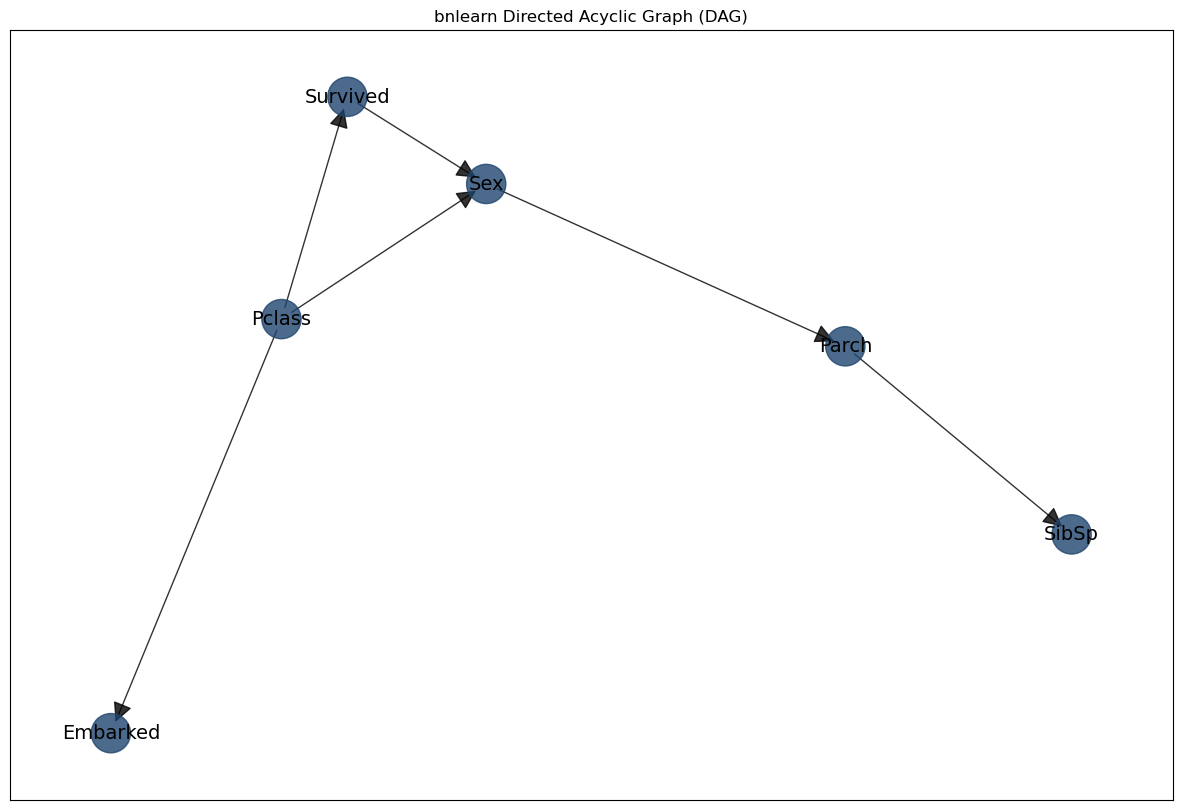

In [59]:
import bnlearn
# Load example mixed dataset
df_raw = bnlearn.import_example(data='titanic')

# Convert to onehot
dfhot, dfnum = bnlearn.df2onehot(df_raw)

# Structure learning after removing 'Survived','Pclass','Sex','Embarked','Parch'.
DAG_nodes = bnlearn.structure_learning.fit(dfnum, methodtype='hc', bw_list_method='nodes', black_list=['Survived','Pclass','Sex','Embarked','Parch'])

# Structure learning by enforcing variables 'Survived','Pclass','Sex','Embarked','Parch'.
DAG_edges = bnlearn.structure_learning.fit(dfnum, methodtype='hc', bw_list_method='edges', black_list=['Survived','Pclass','Sex','Embarked','Parch'])

# Plot
Gf = bnlearn.plot(DAG_nodes)
Ge = bnlearn.plot(DAG_edges)

In [46]:

# Example dataframe sprinkler_data.csv can be loaded with:
#df = bn.import_example()
# df = pd.read_csv('sprinkler_data.csv')
model = bn.structure_learning.fit(data)


[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).


In [4]:
import pandas as pd
from pgmpy.estimators import ExhaustiveSearch

,CH,Part,RTM_BACKSIDE_HE_FLOW_Step=07_Filter0_Mean,RTM_BACKSIDE_HE_PRESS_Step=07_Filter0_Mean,RTM_BIAS_RF_VOLTAGE_PROBE_Step=07_Filter0_Mean,RTM_BTM_RF_FWD_PFT_Step=07_Filter0_Mean,RTM_BTM_RF_FWD_PWR_Step=07_Filter0_Mean,RTM_CH_BTM_TEMP_Step=07_Filter0_Mean,RTM_CH_PRESS_Step=07_Filter0_Mean,RTM_PROCHM_PRE_VLV_Step=07_Filter0_Mean,...,RTM_GAS6_SF6_Step=09_Filter0_Mean,RTM_PROCHM_PRE_VLV_Step=09_Filter0_Mean,RTM_TIME_Step=09_Filter0_Mean,RTM_TOP_RF_FWD_PWR_Step=09_Filter0_Mean,RTM_TOP_RF_RFT_PWR_Step=09_Filter0_Mean,RTM_BTM_RF_FWD_PFT_Step=12_Filter0_Mean,RTM_PROCHM_PRE_VLV_Step=12_Filter0_Mean,RTM_TOP_RF_FWD_PWR_Step=12_Filter0_Mean,RTM_TOP_RF_RFT_PWR_Step=12_Filter0_Mean,Y
0,4,8996,1.904297,14.77051,100.78130,0.000000,39.64844,50.0,4.150391,163.2735,...,16.00037,98.33913,178.04,997.3535,1.152344,1.132813,116.9837,249.4824,0.000000,13972.4
1,4,8996,1.855469,14.77051,100.78130,0.000000,39.64844,49.8,4.150391,162.6306,...,15.99884,98.01767,178.04,997.3535,1.152344,1.132813,116.6622,248.9063,0.000000,13989.6
2,3,8177,3.662109,14.96582,104.88280,0.000000,39.84375,50.8,4.150391,167.1310,...,15.99884,101.87520,179.05,998.5059,1.152344,1.171875,117.3051,249.4824,0.000000,14106.8
3,2,8177,6.103516,14.96582,110.15630,0.000000,39.64844,50.7,4.101563,175.8103,...,15.99976,105.08970,176.03,999.4653,1.137695,1.132813,124.6986,249.7241,0.568848,13726.4
4,3,8177,3.564453,14.96582,104.88280,0.000000,39.84375,50.7,4.150391,166.4881,...,15.99731,101.87520,180.06,997.9297,1.152344,1.171875,117.3051,249.4824,0.576172,14222.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,2,8997,0.732422,14.96582,113.67190,-0.566406,38.51563,51.1,4.101563,159.7375,...,15.99884,94.16019,179.02,996.6211,0.000000,1.132813,109.9116,248.0176,-0.568848,14150.8
632,2,8997,0.732422,14.96582,113.67190,-0.566406,39.08203,51.1,4.150391,162.6306,...,15.99884,93.19582,179.03,997.1899,0.000000,1.132813,109.9116,248.0176,0.000000,14143.6
633,3,8997,1.416016,14.96582,99.60938,0.585938,39.25781,50.5,4.150391,167.1310,...,15.99731,101.23230,176.04,997.4590,1.702148,1.171875,116.3407,249.6484,0.567383,14077.6
634,3,8997,1.464844,14.96582,100.78130,0.000000,39.25781,50.4,4.150391,167.4525,...,15.99884,101.55370,177.08,997.4590,1.134766,1.171875,116.6622,249.0811,0.567383,14242.4


In [19]:
dfhot, dfnum = bn.df2onehot(data)


[df2onehot] >Auto detecting dtypes.


100%|██████████| 31/31 [00:00<00:00, 588.97it/s]


[df2onehot] >Set dtypes in dataframe..


[df2onehot]: 100%|██████████| 31/31 [00:00<00:00, 1005.98it/s]

[df2onehot] >Total onehot features: 6


In [22]:
bn.structure_learning.fit(dfnum)

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).


{'model': <pgmpy.base.DAG.DAG at 0x2234fa5eb20>,
 'model_edges': [],
 'adjmat': target     CH   Part
 source              
 CH      False  False
 Part    False  False,
 'config': {'method': 'hc',
  'scoring': 'bic',
  'black_list': None,
  'white_list': None,
  'bw_list_method': None,
  'max_indegree': None,
  'tabu_length': 100,
  'epsilon': 0.0001,
  'max_iter': 1000000.0,
  'root_node': None,
  'class_node': None,
  'fixed_edges': set(),
  'return_all_dags': False,
  'n_jobs': -1,
  'verbose': 3},
 'structure_scores': {'k2': -1307.6239105420138,
  'bic': -1308.9479012479762,
  'bdeu': -1309.1256330876174,
  'bds': -1309.8187802681773}}

In [191]:

from causal_discovery_utils.cond_indep_tests import CondIndepParCorr  # import a CI test that estimates partial correlation


ModuleNotFoundError: No module named 'causal_discovery_utils'

In [33]:
par_corr_test = CondIndepParCorr(dataset, threshold=0.01)  # CI test with the given significance level
icd = LearnStructICD(nodes_set, par_corr_test)  # instantiate an ICD learner
icd.learn_structure()  # learn the causal graph


[bnlearn] >Compute edge strength with [chi_square]


,source,target,stat_test,p_value,chi_square,dof
0,CH,RTM_TOP_RF_RFT_PWR_Step=09_Filter0_Mean,True,2.224156e-250,1248.244137,22
1,CH,RTM_TOP_RF_FWD_PWR_Step=12_Filter0_Mean,True,2.588880e-245,1248.655494,28
2,CH,RTM_TOP_RF_FWD_PWR_Step=07_Filter0_Mean,True,5.956449e-245,1254.723009,30
3,CH,RTM_TOP_RF_FWD_PWR_Step=09_Filter0_Mean,True,4.430208e-241,1259.042257,36
4,CH,RTM_BTM_RF_FWD_PFT_Step=09_Filter0_Mean,True,6.904104e-180,867.306749,10
5,CH,RTM_BTM_RF_FWD_PWR_Step=09_Filter0_Mean,True,1.865261e-158,758.431040,8
6,CH,RTM_TOP_RF_RFT_PWR_Step=12_Filter0_Mean,True,6.226584e-177,871.247992,14
7,CH,RTM_BTM_RF_FWD_PFT_Step=12_Filter0_Mean,True,6.020282e-133,639.942011,8
8,CH,RTM_BTM_RF_FWD_PFT_Step=07_Filter0_Mean,True,2.393766e-137,650.929593,6
9,CH,RTM_CH_BTM_TEMP_Step=09_Filter0_Mean,True,1.682710e-213,1106.368520,30


[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


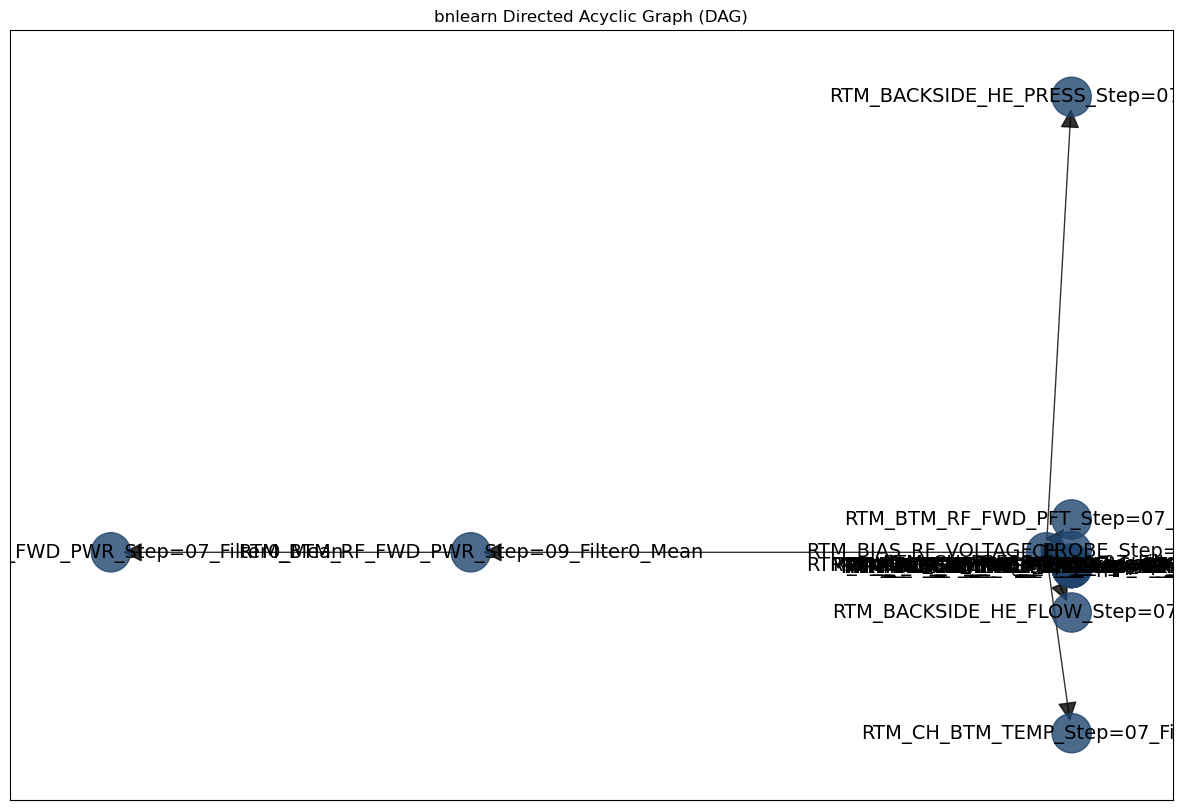

{'fig': <Figure size 1500x1000 with 1 Axes>,
 'ax': <Figure size 1500x1000 with 1 Axes>,
 'pos': {'CH': array([3.82455011e-02, 1.38833599e-17]),
  'RTM_BACKSIDE_HE_FLOW_Step=07_Filter0_Mean': array([ 0.06385744, -0.13214547]),
  'RTM_BACKSIDE_HE_PRESS_Step=07_Filter0_Mean': array([0.06385744, 1.        ]),
  'RTM_BIAS_RF_VOLTAGE_PROBE_Step=07_Filter0_Mean': array([0.06385744, 0.00245638]),
  'RTM_BTM_RF_FWD_PFT_Step=07_Filter0_Mean': array([0.06385744, 0.07214218]),
  'RTM_CH_BTM_TEMP_Step=07_Filter0_Mean': array([ 0.06385744, -0.39709582]),
  'RTM_CH_PRESS_Step=07_Filter0_Mean': array([ 0.06385744, -0.02446715]),
  'RTM_TOP_RF_FWD_PWR_Step=07_Filter0_Mean': array([ 0.06385744, -0.02991734]),
  'RTM_BACKSIDE_HE_FLOW_Step=09_Filter0_Mean': array([ 0.06385744, -0.02991734]),
  'RTM_BACKSIDE_HE_PRESS_Step=09_Filter0_Mean': array([ 0.06385744, -0.02991734]),
  'RTM_BIAS_RF_VOLTAGE_PROBE_Step=09_Filter0_Mean': array([ 0.06385744, -0.02991734]),
  'RTM_BTM_RF_FWD_PFT_Step=09_Filter0_Mean': a

In [35]:
bn.plot(model_learned)

In [6]:
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import BayesianEstimator
m = BayesianNetwork(model.edges())
estimator = BayesianEstimator(m, data)
estimator

In [11]:
data.to_numpy()

array([[4.000000e+00, 8.996000e+03, 1.904297e+00, ..., 2.494824e+02,
        0.000000e+00, 1.397240e+04],
       [4.000000e+00, 8.996000e+03, 1.855469e+00, ..., 2.489063e+02,
        0.000000e+00, 1.398960e+04],
       [3.000000e+00, 8.177000e+03, 3.662109e+00, ..., 2.494824e+02,
        0.000000e+00, 1.410680e+04],
       ...,
       [3.000000e+00, 8.997000e+03, 1.416016e+00, ..., 2.496484e+02,
        5.673830e-01, 1.407760e+04],
       [3.000000e+00, 8.997000e+03, 1.464844e+00, ..., 2.490811e+02,
        5.673830e-01, 1.424240e+04],
       [2.000000e+00, 8.997000e+03, 6.347660e-01, ..., 2.480176e+02,
        0.000000e+00, 1.417260e+04]])

In [14]:
from causallearn.search.ScoreBased.GES import ges

# default parameters
Record = ges(data.to_numpy())


KeyboardInterrupt: 

StopIteration: 

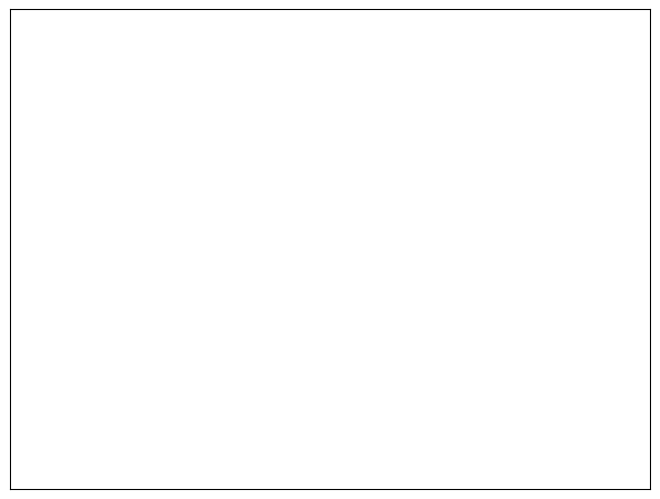

In [49]:
import networkx as nx
import matplotlib.pyplot as plt
nx.draw(model)
plt.draw()

In [129]:
from dowhy import CausalModel
import dowhy.datasets
data = dowhy.datasets.linear_dataset(beta=10,
        num_common_causes=5,
        num_instruments = 2,
        num_effect_modifiers=1,
        num_samples=5000,
        treatment_is_binary=True,
        stddev_treatment_noise=10,
        num_discrete_common_causes=1)

In [131]:
# With graph
model=CausalModel(
        data = df,
        treatment=data["treatment_name"],
        outcome=data["outcome_name"],
        graph=data["gml_graph"]
        )

TypeError: __init__() missing 1 required positional argument: 'treatment'

In [132]:
data["treatment_name"]

['v0']

In [184]:
import cdt


In [185]:
glasso = cdt.independence.graph.Glasso()
skeleton = glasso.predict(data)

In [186]:
new_skeleton = cdt.utils.graph.remove_indirect_links(skeleton, alg='aracne')

In [190]:
model = cdt.causality.graph.GES()
output_graph = model.predict(data, new_skeleton)

ImportError: R Package pcalg is not available.